In [34]:
import os
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks

In [69]:
def generator(dir, 
              gen=image.ImageDataGenerator(rescale=1./255), 
              shuffle=True,batch_size=1,
              target_size=(24,24),
              class_mode='categorical' ):

    return gen.flow_from_directory(dir,
                                   batch_size=batch_size,
                                   shuffle=shuffle,
                                   color_mode='grayscale',
                                   class_mode=class_mode,
                                   target_size=target_size)

In [70]:
BS= 32
TS=(24,24)
train_batch= generator('../raw_data/yawn/train_yawn',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('../raw_data/yawn/valid_yawn',shuffle=True, batch_size=BS,target_size=TS)
test_batch = generator('../raw_data/yawn/test_yawn',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)


Found 498 images belonging to 2 classes.
Found 78 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
15 2


In [71]:
pred_batch= generator('../raw_data/yawn/valid_yawn',shuffle=True, batch_size=4,target_size=TS)


Found 78 images belonging to 2 classes.


In [39]:
recall = tensorflow.keras.metrics.Recall(thresholds=None, top_k=None, class_id=None, name=None, dtype=None)
es = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [40]:
def model_y():
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
        MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

        Conv2D(32,(3,3),activation='relu'),
        #MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

    #32 convolution filters used each of size 3x3
    #again
        Conv2D(64, (3, 3), activation='relu'),
        #MaxPooling2D(pool_size=(2,2), strides = 2, padding="same"),

    #64 convolution filters used each of size 3x3
    #choose the best features via pooling

    #randomly turn neurons on and off to improve convergence
        #Dropout(0.25),
    #flatten since too many dimensions, we only want a classification output
        Flatten(),
    #fully connected to get all relevant data
        Dense(128, activation='relu'),
    #one more dropout for convergence' sake :) 
        #Dropout(0.5),
    #output a softmax to squash the matrix into output probabilities
        Dense(2, activation='softmax')
    ])
    
    model.compile(loss="categorical_crossentropy", metrics=[recall], optimizer='adam')

    return model

In [41]:
model_yawn = model_y()

In [42]:
history = model_yawn.fit(train_batch, 
                      validation_data=valid_batch, shuffle = True,
                      epochs=50,steps_per_epoch=SPE, 
                      validation_steps=VS, 
                      callbacks=[es])

Epoch 1/50
15/15 [==============================] - 2s 54ms/step - loss: 0.6887 - recall_4: 0.5429 - val_loss: 0.6237 - val_recall_4: 0.6334
Epoch 2/50
15/15 [==============================] - 0s 24ms/step - loss: 0.5871 - recall_4: 0.6487 - val_loss: 0.4988 - val_recall_4: 0.6933
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.4220 - recall_4: 0.7065 - val_loss: 0.2948 - val_recall_4: 0.7390
Epoch 4/50
15/15 [==============================] - 0s 25ms/step - loss: 0.4079 - recall_4: 0.7469 - val_loss: 0.3010 - val_recall_4: 0.7665
Epoch 5/50
15/15 [==============================] - 0s 27ms/step - loss: 0.2756 - recall_4: 0.7745 - val_loss: 0.2755 - val_recall_4: 0.7872
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 0.2565 - recall_4: 0.7936 - val_loss: 0.3320 - val_recall_4: 0.8073
Epoch 7/50
15/15 [==============================] - 0s 25ms/step - loss: 0.2280 - recall_4: 0.8116 - val_loss: 0.3086 - val_recall_4: 0.8234
Epoch 8/50
15

In [45]:
history.history

{'loss': [0.6756247282028198,
  0.5404249429702759,
  0.3771577775478363,
  0.3707066774368286,
  0.316884845495224,
  0.2415078729391098,
  0.20816276967525482,
  0.22335518896579742,
  0.1776890605688095,
  0.1182829886674881,
  0.1429125964641571,
  0.11414849013090134,
  0.11108577996492386,
  0.09834364056587219,
  0.07590170204639435,
  0.07084818929433823,
  0.05552195385098457,
  0.04001864790916443,
  0.059975747019052505,
  0.031616028398275375,
  0.034121498465538025,
  0.08566924929618835,
  0.04792259633541107,
  0.04316962510347366,
  0.01934371329843998,
  0.014764579944312572,
  0.008167228661477566,
  0.008101196028292179,
  0.011480356566607952,
  0.005249490961432457,
  0.004776426125317812,
  0.003700172295793891,
  0.0027323823887854815],
 'recall_4': [0.5612664818763733,
  0.6612950563430786,
  0.716377854347229,
  0.7514075040817261,
  0.7783699035644531,
  0.7978007197380066,
  0.8149378299713135,
  0.8286368250846863,
  0.839772641658783,
  0.8519430756568909,


In [68]:
res = model_yawn.evaluate(test_batch, steps=len(test_batch)) 

2/2 [==============================] - 0s 7ms/step - loss: 0.1264 - recall_4: 0.9516


<function matplotlib.pyplot.show(close=None, block=None)>

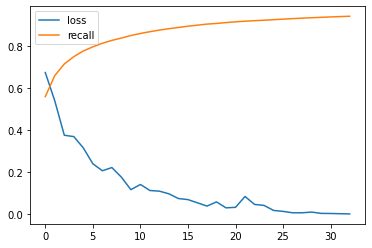

In [65]:
plt.plot(history.history['loss'], label ='loss')
plt.plot(history.history['recall_4'], label ='recall')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

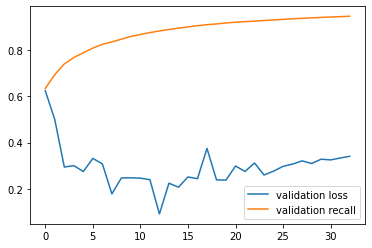

In [66]:
plt.plot(history.history['val_loss'], label ='validation loss')
plt.plot(history.history['val_recall_4'], label ='validation recall')
plt.legend()
plt.show

In [61]:
model.save('../models/model_yawn.h5', overwrite=True)